In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install statsmodels==0.13.0
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import missingno

import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import tensorflow_probability as tfp
tfd = tfp.distributions
tfs = tfp.stats

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

In [ ]:
import glob

#get all csv file names
filepath='Datafor555/TX'
all_files = glob.glob(filepath + "/*.csv")

#put all csv file names into a list
li = []
for filename in all_files:
    yr=filename[-6:-4]
    df_tx = pd.read_csv(filename)
    df_tx['year']=yr
    li.append(df_tx)

#concatenate all csv files into a dataframe
df_TX = pd.concat(li, axis=0)

# df.loc[:,['AverageTemp','YearlyPrecipiation','Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048']]
df_TX_grouped_yearly=df_TX.groupby(['year']).mean()

df_TX_grouped_yearly

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,96,102,106,107,108,109,113,114,121,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,96,98,102,106,107,108,109,113,114,121,130,131,133) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,36,37,38,39,41,44,61,63,66,67,68,69,70,75,76,77,79,80,86,87,88,96,98,102,106,107,108,109,113,114,119,120,121,123,124,128,129,130,131,133) have mixed types.Specify dtype option on import or s

,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,HISTORY_037,NAV_VERT_CLR_MT_039,NAV_HORR_CLR_MT_040,SERVICE_ON_042A,SERVICE_UND_042B,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,APPR_KIND_044A,APPR_TYPE_044B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,HORR_CLR_MT_047,MAX_SPAN_LEN_MT_048,...,LEFT_CURB_MT_050A,RIGHT_CURB_MT_050B,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,VERT_CLR_OVER_MT_053,VERT_CLR_UND_054B,LAT_UND_MT_055B,LEFT_LAT_UND_MT_056,OPERATING_RATING_064,INVENTORY_RATING_066,POSTING_EVAL_070,WORK_PROPOSED_075A,WORK_DONE_BY_075B,IMP_LEN_MT_076,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,FRACTURE_LAST_DATE_093A,UNDWATER_LAST_DATE_093B,SPEC_LAST_DATE_093C,BRIDGE_IMP_COST_094,ROADWAY_IMP_COST_095,TOTAL_IMP_COST_096,YEAR_OF_IMP_097,OTHER_STATE_PCNT_098B,STRAHNET_HIGHWAY_100,TRAFFIC_DIRECTION_102,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUFFICIENCY_RATING,SUBMITTED_BY,LOWEST_RATING,DECK_AREA,CAT29
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00,48,3.055728,1.448267,0.032413,12.614589,242.722058,7624.508242,89.206924,13.790968,0.088608,0.000000,2.799173e+07,8.798031e+07,12.027310,2.995310,1.927551,2.014795,9.270767,1964.879577,2.374993,1.177400,9047.668036,1996.700047,11.332170,0.194714,10.737290,0.014641,4.692777,0.064790,0.078713,1.499150,4.210353,2.711056,7.600553,0.316319,0.975644,3.986732,0.595770,13.389030,12.564839,...,0.162567,0.178588,8.768519,10.047308,98.980373,0.874219,84.542481,7.726197,36.848775,26.847674,4.577921,35.112192,1.002637,26.938622,707.741599,26.651904,615.258065,693.151358,675.792593,250.111010,54.593382,201.158216,1998.019841,27.333333,0.303139,1.877209,0.340984,0.030769,384.621653,15.300522,0.211474,1.172982,12850.670733,2017.667964,87.871739,81.279814,NaN,NaN,NaN,NaN
01,48,3.054950,1.449420,0.032241,12.617845,242.518591,7795.674947,89.045126,13.759572,0.052632,0.000000,3.059835e+07,9.617734e+07,11.928488,2.994347,2.057419,2.128996,9.319746,1965.256948,2.395895,1.206913,10560.063814,1998.349045,11.358523,0.187209,10.979897,0.015047,4.694443,0.064013,0.071789,1.496378,4.202445,2.708096,7.610374,0.316564,0.967987,3.983689,0.597833,13.469594,12.647591,...,0.165586,0.190435,8.964702,10.285906,98.920752,0.862847,84.256498,6.643208,36.977418,26.936632,4.601920,35.171461,1.001916,26.504448,695.636119,26.765618,671.825119,683.669643,683.304688,588.400656,57.832869,301.982485,1998.697764,29.057692,0.303435,1.872484,0.339162,0.011135,384.456388,15.916334,0.210794,1.169903,13513.874663,2018.700821,87.969565,81.408798,NaN,NaN,NaN,NaN
02,48,3.068612,1.445364,0.032260,12.628159,242.187501,7849.529615,88.997651,13.659828,0.078611,0.000000,3.064867e+07,9.635428e+07,11.957865,2.993878,2.079872,2.129572,9.355285,1965.954242,2.404039,1.218384,10896.715687,1999.318853,11.348323,0.179878,11.100269,0.015522,4.699894,0.064878,0.073577,1.483630,4.202760,2.720206,7.627133,0.318139,0.963729,3.978248,0.596462,13.363052,12.715296,...,0.166736,0.193402,9.125029,10.452686,98.915878,0.861237,84.146849,6.182717,37.297264,27.158745,4.629400,35.281319,1.002110,26.326901,654.074282,26.605691,673.835017,661.191327,684.500000,594.301668,58.304608,305.611610,1999.490623,29.627451,0.283830,1.866397,0.339414,0.009319,386.702768,15.836286,0.210477,1.196396,13571.028967,2019.111109,95.635849,81.804078,NaN,NaN,NaN,NaN
03,48,3.079804,1.460735,0.032448,12.640046,241.970455,7922.703148,88.825266,13.671665,0.150212,0.000000,3.100265e+07,9.726901e+07,11.814691,2.992191,2.091808,2.207375,9.405617,1966.752933,2

In [ ]:
d={'92':1992, '93':1993, '94':1994,'95':1995,'96':1996,'97':1997,'98':1998,'99':1999,'00':2000,'01':2001,'02':2002,'03':2003,'04':2004,'05':2005,'06':2006,'07':2007,'08':2008,'09':2009,'10':2010,'11':2011,'12':2012,'13':2013,'14':2014,'15':2015,'16':2016,'17':2017,'18':2018,'19':2019,'20':2020}
df_TX['year']=df_TX['year'].map(d)
df_TX

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29
0,48,010600013603019,1,3.0,1.0,24,0.0,1.0,119.0,0.0,BARNETT SLOUGH,NaN,ST 24,1.5MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33180600.0,95504200.0,10.0,3.0,1.0,1.0,2.0,1930.0,2.0,0.0,4400.0,1990.0,4,13.4,0.0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,1962.0,N,N,N,N,18.0,0.0,NaN,Y,8,8740.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,90.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48,010600013603021,1,3.0,1.0,24,0.0,1.0,119.0,0.0,JERNIGAN CREEK REL.,NaN,ST 24,3.8MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33190600.0,95481800.0,11.0,3.0,1.0,1.0,2.0,1933.0,2.0,0.0,3800.0,1990.0,4,13.4,0.0,0.0,0.0,1,1,1,1,...,NaN,NaN,NaN,1968.0,1,6,0,0,19.0,0.0,NaN,Y,5,8000.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,93.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,010600013603022,1,3.0,1.0,24,0.0,1.0,119.0,0.0,JERNIGAN CREEK REL.,NaN,ST 24,3.9MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33191200.0,95481200.0,11.0,3.0,1.0,1.0,2.0,1922.0,2.0,0.0,3800.0,1990.0,4,13.4,0.0,0.0,0.0,1,1,1,1,...,NaN,NaN,NaN,1968.0,1,6,0,0,19.0,0.0,NaN,Y,8,8000.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,93.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,010600013603023,1,3.0,1.0,24,0.0,1.0,119.0,0.0,JERNIGAN CREEK,NaN,ST 24,3.9MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33191800.0,95480600.0,11.0,3.0,1.0,1.0,2.0,1933.0,2.0,0.0,3800.0,1990.0,4,13.4,0.0,0.0,0.0,1,1,1,1,...,NaN,NaN,NaN,1968.0,1,6,0,0,19.0,0.0,NaN,Y,8,8000.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,93.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,48,010600013603026,1,3.0,1.0,24,0.0,1.0,119.0,0.0,SNAIL CREEK,NaN,ST 24,6.1MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33200600.0,95460000.0,11.0,3.0,1.0,1.0,2.0,1934.0,2.0,0.0,3600.0,1990.0,4,12.8,0.0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,1959.0,N,N,N,N,25.0,0.0,NaN,Y,8,7490.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,90.1,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52219,48,252420027513093,2,1.0,1.0,40,0.0,NaN,483.0,0.0,LOOP-556 U-PASS,NaN,LOOP-556 (US-66),1.305M E JCT US 83 IN SHA,5.02,NaN,NaN,NaN,NaN,35134200.0,100133000.0,0.0,3.0,NaN,NaN,1.0,1970.0,2.0,4.0,9900.0,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52220,48,252420027513094,2,1.0,1.0,40,0.0,NaN,483.0,0.0,FM-2168 U-PASS,NaN,FM 2168,4.767M E JCT 

In [ ]:
weatherdata = pd.read_csv("Datafor555/avg_temp.TX.csv", index_col=False)
TXweather = weatherdata.loc[:,['year','avg_temp','avg_prcp','max_temp','min_temp']]
TXweather

,year,avg_temp,avg_prcp,max_temp,min_temp
0,1992,64.4,33.60,76.2,52.6
1,1993,64.1,27.37,76.2,51.9
2,1994,65.6,29.31,77.8,53.3
3,1995,65.2,27.68,77.6,52.8
4,1996,65.4,24.60,78.4,52.5
5,1997,63.9,34.19,75.6,52.2
6,1998,67.0,27.99,79.3,54.8
7,1999,66.6,22.05,79.6,53.6
8,2000,66.5,27.83,78.8,54.1
9,2001,65.7,29.11,77.5,53.8


In [ ]:
df1_TX=df_TX.merge(TXweather, left_index=False)
df1_TX

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,year,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,CAT10,CAT23,CAT29,avg_temp,avg_prcp,max_temp,min_temp
0,48,010600013603019,1,3.0,1.0,24,0.0,1.0,119.0,0.0,BARNETT SLOUGH,NaN,ST 24,1.5MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33180600.0,95504200.0,10.0,3.0,1.0,1.0,2.0,1930.0,2.0,0.0,4400.0,1990.0,4,13.4,0.0,0.0,0.0,0,0,0,0,...,N,N,N,N,18.0,0.0,NaN,Y,8,8740.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,90.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.4,33.60,76.2,52.6
1,48,010600013603021,1,3.0,1.0,24,0.0,1.0,119.0,0.0,JERNIGAN CREEK REL.,NaN,ST 24,3.8MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33190600.0,95481800.0,11.0,3.0,1.0,1.0,2.0,1933.0,2.0,0.0,3800.0,1990.0,4,13.4,0.0,0.0,0.0,1,1,1,1,...,1,6,0,0,19.0,0.0,NaN,Y,5,8000.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,93.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.4,33.60,76.2,52.6
2,48,010600013603022,1,3.0,1.0,24,0.0,1.0,119.0,0.0,JERNIGAN CREEK REL.,NaN,ST 24,3.9MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33191200.0,95481200.0,11.0,3.0,1.0,1.0,2.0,1922.0,2.0,0.0,3800.0,1990.0,4,13.4,0.0,0.0,0.0,1,1,1,1,...,1,6,0,0,19.0,0.0,NaN,Y,8,8000.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,93.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.4,33.60,76.2,52.6
3,48,010600013603023,1,3.0,1.0,24,0.0,1.0,119.0,0.0,JERNIGAN CREEK,NaN,ST 24,3.9MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33191800.0,95480600.0,11.0,3.0,1.0,1.0,2.0,1933.0,2.0,0.0,3800.0,1990.0,4,13.4,0.0,0.0,0.0,1,1,1,1,...,1,6,0,0,19.0,0.0,NaN,Y,8,8000.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,93.0,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.4,33.60,76.2,52.6
4,48,010600013603026,1,3.0,1.0,24,0.0,1.0,119.0,0.0,SNAIL CREEK,NaN,ST 24,6.1MI E HUNT CO LINE,99.99,NaN,NaN,NaN,NaN,33200600.0,95460000.0,11.0,3.0,1.0,1.0,2.0,1934.0,2.0,0.0,3600.0,1990.0,4,12.8,0.0,0.0,0.0,0,0,0,0,...,N,N,N,N,25.0,0.0,NaN,Y,8,7490.0,2010.0,NaN,N,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,*,90.1,Y,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.4,33.60,76.2,52.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565011,48,252420027513093,2,1.0,1.0,40,0.0,NaN,483.0,0.0,LOOP-556 U-PASS,NaN,LOOP-556 (US-66),1.305M E JCT US 83 IN SHA,5.02,NaN,NaN,NaN,NaN,35134200.0,100133000.0,0.0,3.0,NaN,NaN,1.0,1970.0,2.0,4.0,9900.0,1992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.6,29.31,77.8,53.3
1565012,48,252420027513094,2,1.0,1.0,40,0.0,NaN,483.0,0.0,FM-2168 U-PASS,NaN,FM 2168,4.767M E JCT 83 IN SHAMRO,5.38,NaN,Na

In [ ]:
df1_TX['Age_of_Bridge'] = df1_TX['year']-df1_TX['YEAR_BUILT_027']
df2_TX=df1_TX.loc[:,['Age_of_Bridge','TRAFFIC_LANES_ON_028A','ADT_029','MAX_SPAN_LEN_MT_048','MAIN_UNIT_SPANS_045','ROADWAY_WIDTH_MT_051','APPR_WIDTH_MT_032','avg_temp','avg_prcp','min_temp','max_temp','DECK_COND_058','SUPERSTRUCTURE_COND_059','SUBSTRUCTURE_COND_060']]
df2_TX.dropna(inplace=True)
df3_TX=df2_TX[(df2_TX['SUBSTRUCTURE_COND_060']!='N') & (df2_TX['SUPERSTRUCTURE_COND_059']!='N') & (df2_TX['DECK_COND_058']!='N')]
for col in df3_TX:
  df3_TX[col]=df3_TX[col].astype(float)
df3_TX

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,avg_temp,avg_prcp,min_temp,max_temp,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
1,59.0,2.0,3800.0,12.2,3.0,13.4,13.4,64.4,33.60,52.6,76.2,6.0,6.0,8.0
2,70.0,2.0,3800.0,6.1,3.0,13.4,13.4,64.4,33.60,52.6,76.2,8.0,6.0,7.0
3,59.0,2.0,3800.0,8.5,3.0,13.4,13.4,64.4,33.60,52.6,76.2,7.0,6.0,7.0
5,58.0,2.0,4000.0,8.2,7.0,12.8,12.8,64.4,33.60,52.6,76.2,6.0,5.0,5.0
6,58.0,2.0,4000.0,8.2,5.0,12.8,12.8,64.4,33.60,52.6,76.2,6.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560026,10.0,2.0,25.0,10.4,1.0,5.9,5.8,65.6,29.31,53.3,77.8,8.0,7.0,8.0
1560027,10.0,2.0,25.0,16.5,1.0,5.9,6.1,65.6,29.31,53.3,77.8,8.0,8.0,8.0
1560028,15.0,1.0,10.0,6.1,3.0,6.2,5.5,65.6,29.31,53.3,77.8,5.0,8.0,8.0
1560029,10.0,2.0,15.0,9.1,2.0,5.9,6.1,65.6,29.31,53.3,77.8,6.0,8.0,7.0


In [ ]:
# Separate the Feature data X from the response data y1,y2,y3
X=df3_TX.iloc[:,:-3] # All columns except for the last 3 columns
y1=df3_TX.iloc[:,-3] #The last column would be our response variable in our case, Deck Condition
y2=df3_TX.iloc[:,-2]  #The last column would be our response variable in our case, SuperStructure Condition
y3=df3_TX.iloc[:,-1]  #The last column would be our response variable in our case, Substructure Condition

Please do not run, this will crash the server, instead run the Gradient Boosting Trees

For the Deck

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
model.best_estimator_

In [ ]:
pred=model.predict(X_test)
pred

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test, pred)

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the deck is {metrics.accuracy_score(y_test, pred)*100 :.2f}%')

For SuperStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X1_train,y1_train)

In [ ]:
model.best_estimator_

In [ ]:
pred=model.predict(X1_test)
pred

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y1_test, pred)

In [ ]:
# Print the accuracy score
print(f'The accuracy score value for the Superstructure is {metrics.accuracy_score(y1_test, pred)*100 :.2f}%')

In [ ]:
For the SubStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

# parameters = {'alpha':[10, 100, 1000], 'max_iter':[1000, 10000]}
parameters = {'n_neighbors':[5,10,100, 1000]}

model = GridSearchCV(clf, parameters, scoring='accuracy',n_jobs=-1, cv=5)
model.fit(X2_train,y2_train)

In [ ]:
model.best_estimator_

In [ ]:
pred=model.predict(X2_test)
pred

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y2_test, pred)

In [ ]:
# Print the accuracy score
print(f'the accuracy score value for the Sub-Structure is {metrics.accuracy_score(y2_test, pred)*100 :.2f}%')

Correlation

In [ ]:
df3_TX.corr()

,Age_of_Bridge,TRAFFIC_LANES_ON_028A,ADT_029,MAX_SPAN_LEN_MT_048,MAIN_UNIT_SPANS_045,ROADWAY_WIDTH_MT_051,APPR_WIDTH_MT_032,avg_temp,avg_prcp,min_temp,max_temp,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060
Age_of_Bridge,1.000000,-0.083584,-0.065414,-0.310311,0.048707,-0.125369,-0.082324,0.037868,0.002091,0.042317,0.029602,-0.351853,-0.478820,-0.427266
TRAFFIC_LANES_ON_028A,-0.083584,1.000000,0.501968,0.210235,0.052612,0.795999,0.691540,0.036277,-0.001400,0.035876,0.031547,0.063764,0.142823,0.141732
ADT_029,-0.065414,0.501968,1.000000,0.246619,0.062491,0.564416,0.508943,0.031616,-0.004431,0.029816,0.028641,-0.014627,0.054370,0.066413
MAX_SPAN_LEN_MT_048,-0.310311,0.210235,0.246619,1.000000,0.021688,0.312114,0.298248,0.060348,0.000806,0.061009,0.051467,0.080175,0.201929,0.221119
MAIN_UNIT_SPANS_045,0.048707,0.052612,0.062491,0.021688,1.000000,0.086991,0.102692,-0.002190,-0.000292,-0.002196,-0.001907,-0.037362,-0.007351,-0.040459
ROADWAY_WIDTH_MT_051,-0.125369,0.795999,0.564416,0.312114,0.086991,1.000000,0.831437,0.047170,-0.002251,0.046577,0.041117,0.107423,0.201387,0.200075
APPR_WIDTH_MT_032,-0.082324,0.691540,0.508943,0.298248,0.102692,0.831437,1.000000,0.029930,-0.000424,0.029951,0.025839,0.071195,0.157624,0.159204
avg_temp,0.037868,0.036277,0.031616,0.060348,-0.002190,0.047170,0.029930,1.000000,-0.348978,0.856947,0.939579,-0.050765,-0.022166,-0.018298
avg_prcp,0.002091,-0.001400,-0.004431,0.000806,-0.000292,-0.002251,-0.000424,-0.348978,1.000000,0.105943,-0.599723,0.000497,0.006932,0.007159
min_temp,0.042317,0.035876,0.029816,0.061009,-0.002196,0.046577,0.029951,0.856947,0.105943,1.000000,0.631139,-0.049973,-0.021144,-0.016900


In [ ]:
import seaborn as sns

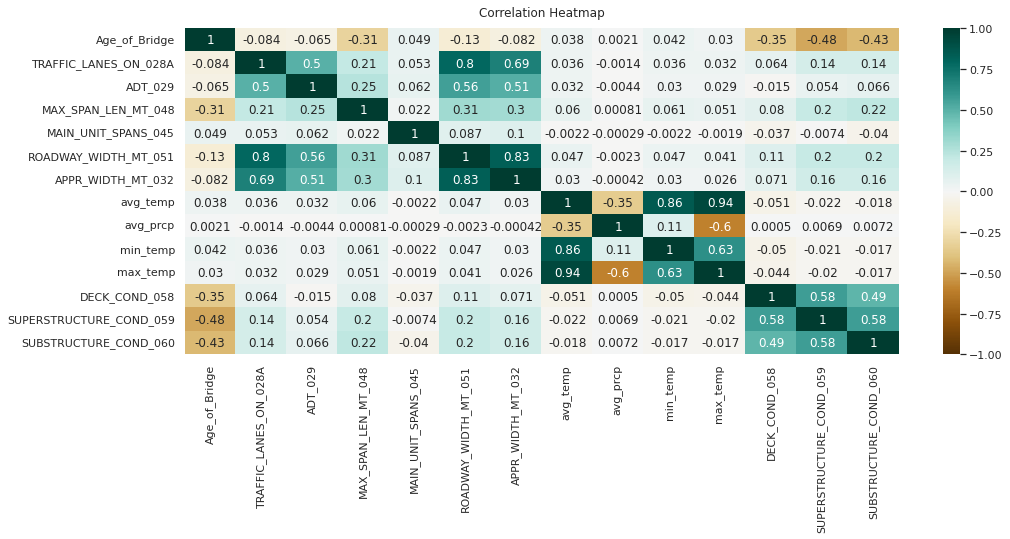

In [ ]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df3_TX.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG');
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('saved_figure.png')

In [ ]:
np.triu(np.ones_like(df3_TX.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

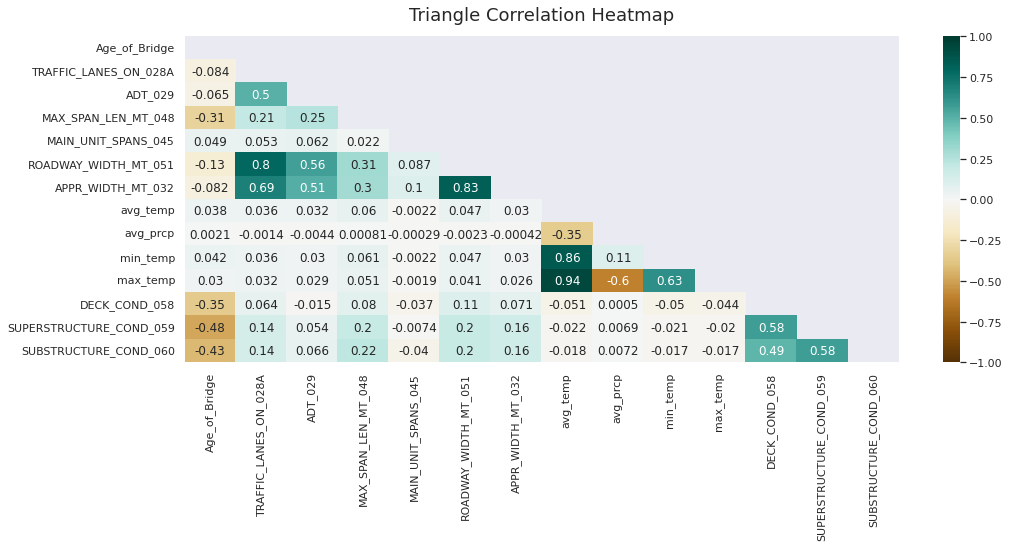

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df3_TX.corr(), dtype=np.bool))
heatmap = sns.heatmap(df3_TX.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

Gradient Boosting Trees for Deck

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5082008688022479

In [ ]:
import pickle
filename = 'GBT_Deck_NY.sav'
pickle.dump(clf, open(filename,'wb'))

In [ ]:
loaded_model = pickle.load(open(filename,'rb'))
result = loaded_model.score(X_test,y_test)
print(result)

0.5082008688022479


In [ ]:
pred=clf.predict(X_test)
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       178
         1.0       0.00      0.00      0.00        84
         2.0       0.00      0.00      0.00        66
         3.0       0.02      0.20      0.03       287
         4.0       0.00      0.00      0.00      1442
         5.0       0.07      0.01      0.02      7318
         6.0       0.33      0.18      0.23     33626
         7.0       0.54      0.88      0.67     94661
         8.0       0.53      0.11      0.18     45931
         9.0       0.00      0.00      0.00      2180

    accuracy                           0.51    185773
   macro avg       0.15      0.14      0.11    185773
weighted avg       0.47      0.51      0.43    185773

[[    0     0     0    49     0     5   111    13     0     0]
 [    0     0     0    16     0     0    43    25     0     0]
 [    0     0     0    26     0     0    36     4     0     0]
 [    0     0     0    56     0     3   119   109   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
This takes into consideration the bridge age

In [ ]:
ivector = []
KA = []
for i in range(0,150,10): # Age of Bridge
      pred_i = clf.predict(np.array([i,2,30000,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA.append(pred_i)
      ivector.append(i)
      print(i,pred_i)

0 8.0
10 7.0
20 7.0
30 7.0
40 7.0
50 7.0
60 7.0
70 7.0
80 7.0
90 7.0
100 7.0
110 7.0
120 7.0
130 7.0
140 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassi

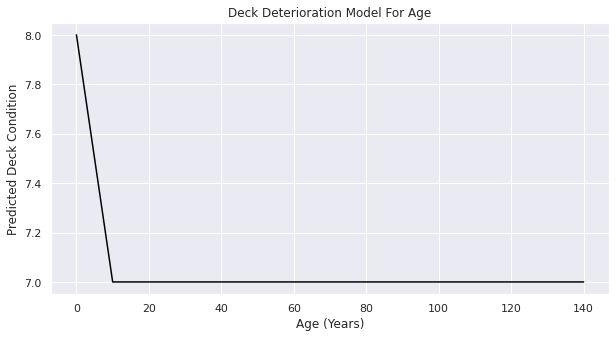

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(ivector, KA, color ='black')
plt.xlabel("Age (Years)")
plt.ylabel("Predicted Deck Condition")
plt.title("Deck Deterioration Model For Age")
plt.show()

In [ ]:
This takes into consideration the Average Daily Traffic 

In [ ]:
KA1 = []
jvector= []
for j in range(0,500000,5000): # Average Daily Traffic
      pred_j = clf.predict(np.array([50,4,j,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA1.append(pred_j)
      jvector.append(j)
      print(j,pred_j)

0 7.0
5000 7.0
10000 7.0
15000 7.0
20000 7.0
25000 7.0
30000 7.0
35000 7.0
40000 7.0
45000 7.0
50000 7.0
55000 7.0
60000 7.0
65000 7.0
70000 7.0
75000 7.0
80000 7.0
85000 7.0
90000 7.0
95000 7.0
100000 7.0
105000 7.0
110000 7.0
115000 7.0
120000 7.0
125000 7.0
130000 7.0
135000 7.0
140000 7.0
145000 7.0
150000 7.0
155000 7.0
160000 7.0
165000 7.0
170000 7.0
175000 7.0
180000 7.0
185000 7.0
190000 7.0
195000 7.0
200000 7.0
205000 7.0
210000 7.0
215000 7.0
220000 7.0
225000 7.0
230000 7.0
235000 7.0
240000 7.0
245000 7.0
250000 7.0
255000 7.0
260000 7.0
265000 7.0
270000 7.0
275000 7.0
280000 7.0
285000 7.0
290000 7.0
295000 7.0
300000 7.0
305000 7.0
310000 7.0
315000 7.0
320000 7.0
325000 7.0
330000 7.0
335000 7.0
340000 7.0
345000 7.0
350000 7.0
355000 7.0
360000 7.0
365000 7.0
370000 7.0
375000 7.0
380000 7.0
385000 7.0
390000 7.0
395000 7.0
400000 7.0
405000 7.0
410000 7.0
415000 7.0
420000 7.0
425000 7.0
430000 7.0
435000 7.0
440000 7.0
445000 7.0
450000 7.0
455000 7.0
460000 7.0
46

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassi

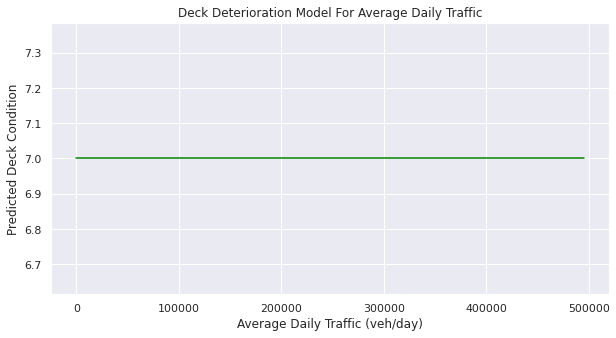

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(jvector, KA1, color ='green')
plt.xlabel("Average Daily Traffic (veh/day)")
plt.ylabel("Predicted Deck Condition")
plt.title("Deck Deterioration Model For Average Daily Traffic")
plt.show()

For Precipitation #

In [ ]:
KA2 = []
kvector = []
for k in range(0,55,5): # Average Precipitation
      pred_k = clf.predict(np.array([50,2,30000,50,25,15,10,50,k,30,85]).reshape(1,-1))[0]
      KA2.append(pred_k)
      kvector.append(k)
      print(k,pred_k)

0 7.0
5 7.0
10 7.0
15 7.0
20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0
50 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassi

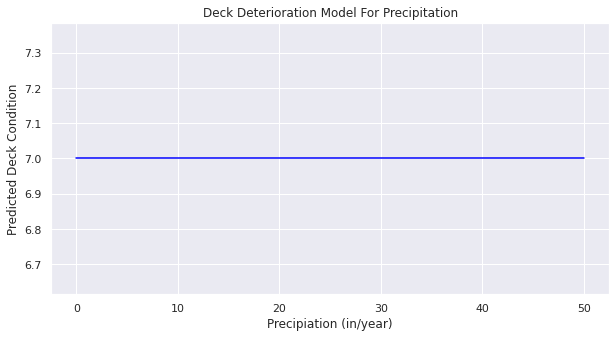

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(kvector, KA2, color ='blue')
plt.xlabel("Precipiation (in/year)")
plt.ylabel("Predicted Deck Condition")
plt.title("Deck Deterioration Model For Precipitation")
plt.show()

# For Average Temperature 

In [ ]:
KA3 = []
lvector =[]
for l in range(20,95,5): # Average Precipitation
      pred_l = clf.predict(np.array([50,2,30000,50,25,15,10,l,40,30,85]).reshape(1,-1))[0]
      KA3.append(pred_l)
      lvector.append(l)
      print(l,pred_l)

20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0
50 7.0
55 7.0
60 7.0
65 7.0
70 7.0
75 7.0
80 7.0
85 7.0
90 7.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GradientBoostingClassi

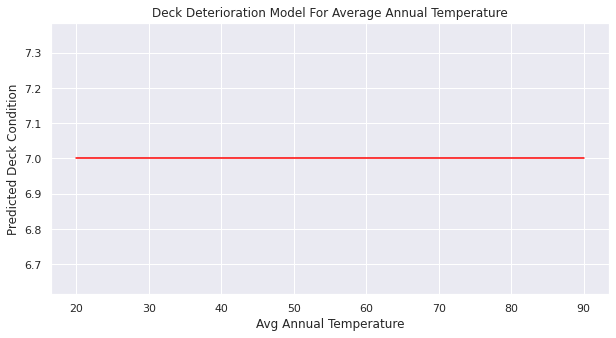

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(lvector, KA3, color ='red')
plt.xlabel("Avg Annual Temperature")
plt.ylabel("Predicted Deck Condition")
plt.title("Deck Deterioration Model For Average Annual Temperature")
plt.show()

Gradient Boosting Trees for SuperStructure

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X1_train, X1_test, y1_train, y1_test = train_test_split(X.values, y2.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X1_train, y1_train)
clf3.score(X1_test, y1_test)

0.49395767953362435

In [ ]:
pred1=clf3.predict(X1_test)
print(classification_report(y1_test, pred1))
print(confusion_matrix(y1_test, pred1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       219
         1.0       0.00      0.00      0.00        66
         2.0       0.00      0.00      0.00       121
         3.0       0.00      0.00      0.00       624
         4.0       0.00      0.00      0.00      2200
         5.0       0.10      0.07      0.08      8747
         6.0       0.41      0.07      0.12     44331
         7.0       0.48      0.75      0.58     78530
         8.0       0.60      0.60      0.60     48476
         9.0       0.00      0.00      0.00      2459

    accuracy                           0.49    185773
   macro avg       0.16      0.15      0.14    185773
weighted avg       0.46      0.49      0.44    185773

[[    0     0     0     0     0     6     9   203     1     0]
 [    0     0     0     0     0     3    10    53     0     0]
 [    0     0     0     0     0     5    13   102     1     0]
 [    0     0     0     0     0    42    34   546   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
KA4 = []
hvector=[]
for h in range(0,150,10): # Age of Bridge
      pred_h = clf3.predict(np.array([h,2,30000,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA4.append(pred_h)
      hvector.append(h)
      print(h,pred_h)

0 8.0
10 8.0
20 8.0
30 7.0
40 7.0
50 7.0
60 7.0
70 7.0
80 7.0
90 7.0
100 7.0
110 7.0
120 7.0
130 7.0
140 7.0


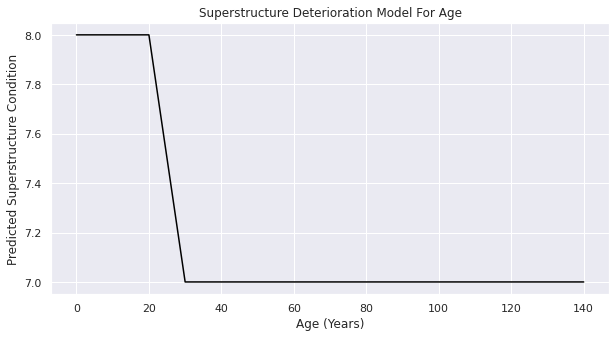

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(hvector, KA4, color ='black')
plt.xlabel("Age (Years)")
plt.ylabel("Predicted Superstructure Condition")
plt.title("Superstructure Deterioration Model For Age")
plt.show()

In [ ]:
KA5 = []
mvector=[]
for m in range(0,500000,5000): # Average Daily Traffic
      pred_m = clf3.predict(np.array([50,4,m,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA5.append(pred_m)
      mvector.append(m)
      print(m,pred_m)

0 7.0
5000 7.0
10000 7.0
15000 7.0
20000 7.0
25000 7.0
30000 7.0
35000 7.0
40000 7.0
45000 7.0
50000 7.0
55000 7.0
60000 7.0
65000 7.0
70000 7.0
75000 7.0
80000 7.0
85000 7.0
90000 7.0
95000 7.0
100000 7.0
105000 7.0
110000 7.0
115000 7.0
120000 7.0
125000 7.0
130000 7.0
135000 7.0
140000 7.0
145000 7.0
150000 7.0
155000 7.0
160000 7.0
165000 7.0
170000 7.0
175000 7.0
180000 7.0
185000 7.0
190000 7.0
195000 7.0
200000 7.0
205000 7.0
210000 7.0
215000 7.0
220000 7.0
225000 7.0
230000 7.0
235000 7.0
240000 7.0
245000 7.0
250000 7.0
255000 7.0
260000 7.0
265000 7.0
270000 7.0
275000 7.0
280000 7.0
285000 7.0
290000 7.0
295000 7.0
300000 7.0
305000 7.0
310000 7.0
315000 7.0
320000 7.0
325000 7.0
330000 7.0
335000 7.0
340000 7.0
345000 7.0
350000 7.0
355000 7.0
360000 7.0
365000 7.0
370000 7.0
375000 7.0
380000 7.0
385000 7.0
390000 7.0
395000 7.0
400000 7.0
405000 7.0
410000 7.0
415000 7.0
420000 7.0
425000 7.0
430000 7.0
435000 7.0
440000 7.0
445000 7.0
450000 7.0
455000 7.0
460000 7.0
46

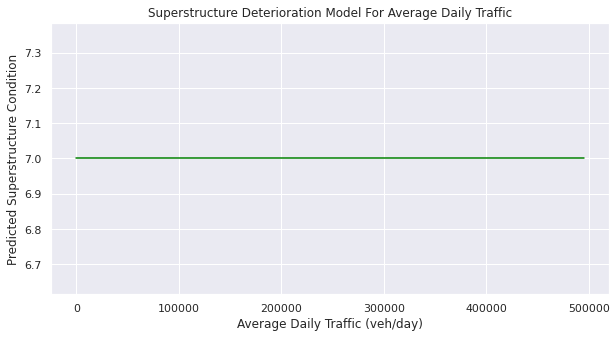

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(mvector, KA5, color ='green')
plt.xlabel("Average Daily Traffic (veh/day)")
plt.ylabel("Predicted Superstructure Condition")
plt.title("Superstructure Deterioration Model For Average Daily Traffic")
plt.show()

In [ ]:
KA6 = []
nvector=[]
for n in range(0,50,5): # Average Precipitation
      pred_n = clf3.predict(np.array([50,2,30000,50,25,15,10,50,n,30,85]).reshape(1,-1))[0]
      KA6.append(pred_n)
      nvector.append(n)
      print(n,pred_n)

0 7.0
5 7.0
10 7.0
15 7.0
20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0


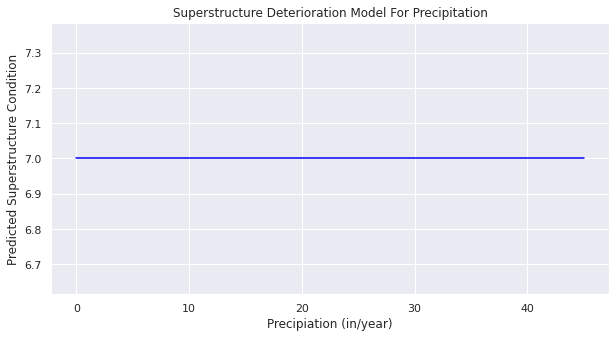

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(nvector, KA6, color ='blue')
plt.xlabel("Precipiation (in/year)")
plt.ylabel("Predicted Superstructure Condition")
plt.title("Superstructure Deterioration Model For Precipitation")
plt.show()

In [ ]:
KA7 = []
tvector=[]
for t in range(0,95,5): # Average Temperature
      pred_t = clf3.predict(np.array([50,2,30000,50,25,15,10,t,40,30,85]).reshape(1,-1))[0]
      KA7.append(pred_t)
      tvector.append(t)
      print(t,pred_t)

0 7.0
5 7.0
10 7.0
15 7.0
20 7.0
25 7.0
30 7.0
35 7.0
40 7.0
45 7.0
50 7.0
55 7.0
60 7.0
65 7.0
70 7.0
75 7.0
80 7.0
85 7.0
90 7.0


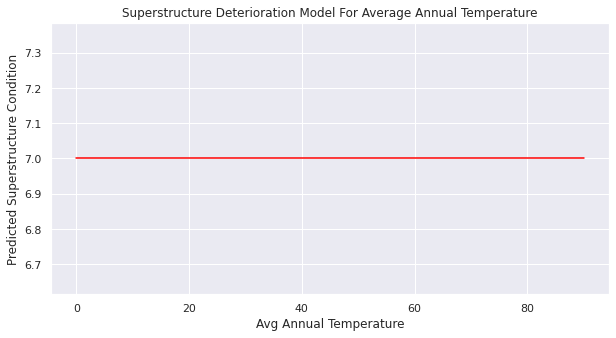

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(tvector, KA7, color ='red')
plt.xlabel("Avg Annual Temperature")
plt.ylabel("Predicted Superstructure Condition")
plt.title("Superstructure Deterioration Model For Average Annual Temperature")
plt.show()

Gradient Boosting Trees for SubStrucute

In [ ]:
# split the dataset into training and testing datasets using a 80%-20% randomized split ##
X2_train, X2_test, y2_train, y2_test = train_test_split(X.values, y3.values, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X2_train, y2_train)
clf2.score(X2_test, y2_test)

0.5292642095460589

In [ ]:
pred2=clf2.predict(X1_test)
print(classification_report(y2_test, pred2))
print(confusion_matrix(y2_test, pred2))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.17      0.00      0.01       241
         1.0       0.00      0.00      0.00        73
         2.0       0.03      0.00      0.01       336
         3.0       0.23      0.00      0.01      1474
         4.0       0.20      0.01      0.02      4442
         5.0       0.25      0.02      0.04     14774
         6.0       0.44      0.45      0.45     49829
         7.0       0.57      0.85      0.68     89054
         8.0       0.00      0.00      0.00     23977
         9.0       0.00      0.00      0.00      1573

    accuracy                           0.53    185773
   macro avg       0.19      0.13      0.12    185773
weighted avg       0.42      0.53      0.45    185773

[[    1     0     3     0     2    14   206    15     0     0]
 [    0     0     1     0     1     5    51    15     0     0]
 [    0     0     1     6     6    29   257    37     0     0]
 [    0     0     2     6    22   138  1084   222   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
KA8 = []
uvector = []
for u in range(0,150,10): # Age of Bridge
      pred_u = clf2.predict(np.array([u,2,30000,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA8.append(pred_u)
      uvector.append(u)
      print(u,pred_u)

0 7.0
10 7.0
20 7.0
30 7.0
40 6.0
50 6.0
60 6.0
70 6.0
80 6.0
90 6.0
100 6.0
110 6.0
120 2.0
130 2.0
140 2.0


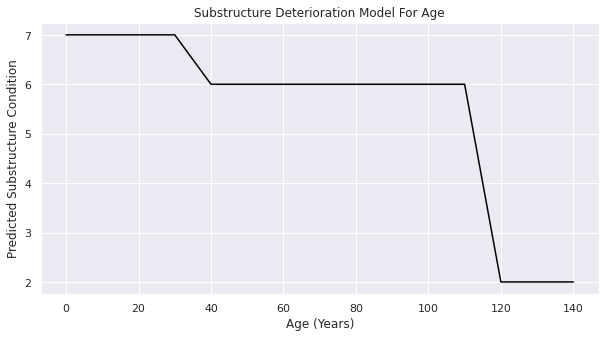

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(uvector, KA8, color ='black')
plt.xlabel("Age (Years)")
plt.ylabel("Predicted Substructure Condition")
plt.title("Substructure Deterioration Model For Age")
plt.show()

In [ ]:
KA9 = []
yvector=[]
for y in range(0,500000,5000): # Average Daily Traffic
      pred_y = clf2.predict(np.array([50,4,y,50,25,15,10,50,40,30,85]).reshape(1,-1))[0]
      KA9.append(pred_y)
      yvector.append(y)
      print(y,pred_y)

0 6.0
5000 6.0
10000 6.0
15000 6.0
20000 6.0
25000 6.0
30000 6.0
35000 6.0
40000 6.0
45000 6.0
50000 6.0
55000 6.0
60000 6.0
65000 6.0
70000 6.0
75000 6.0
80000 6.0
85000 6.0
90000 6.0
95000 6.0
100000 6.0
105000 6.0
110000 6.0
115000 6.0
120000 6.0
125000 6.0
130000 6.0
135000 6.0
140000 6.0
145000 6.0
150000 6.0
155000 6.0
160000 6.0
165000 6.0
170000 6.0
175000 6.0
180000 6.0
185000 6.0
190000 6.0
195000 6.0
200000 6.0
205000 6.0
210000 6.0
215000 6.0
220000 6.0
225000 6.0
230000 6.0
235000 6.0
240000 6.0
245000 6.0
250000 6.0
255000 6.0
260000 6.0
265000 6.0
270000 6.0
275000 6.0
280000 6.0
285000 6.0
290000 6.0
295000 6.0
300000 6.0
305000 6.0
310000 6.0
315000 6.0
320000 6.0
325000 6.0
330000 6.0
335000 6.0
340000 6.0
345000 6.0
350000 6.0
355000 6.0
360000 6.0
365000 6.0
370000 6.0
375000 6.0
380000 6.0
385000 6.0
390000 6.0
395000 6.0
400000 6.0
405000 6.0
410000 6.0
415000 6.0
420000 6.0
425000 6.0
430000 6.0
435000 6.0
440000 6.0
445000 6.0
450000 6.0
455000 6.0
460000 6.0
46

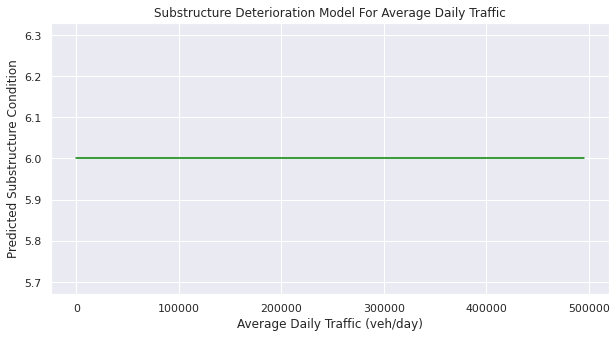

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(yvector, KA9, color ='green')
plt.xlabel("Average Daily Traffic (veh/day)")
plt.ylabel("Predicted Substructure Condition")
plt.title("Substructure Deterioration Model For Average Daily Traffic")
plt.show()

In [ ]:
KA10 = []
xvector=[]
for x in range(0,50,5): # Average Precipitation
      pred_x = clf2.predict(np.array([50,2,30000,50,25,15,10,50,x,30,85]).reshape(1,-1))[0]
      KA10.append(pred_x)
      xvector.append(x)
      print(x,pred_x)

0 6.0
5 6.0
10 6.0
15 6.0
20 6.0
25 6.0
30 6.0
35 6.0
40 6.0
45 6.0


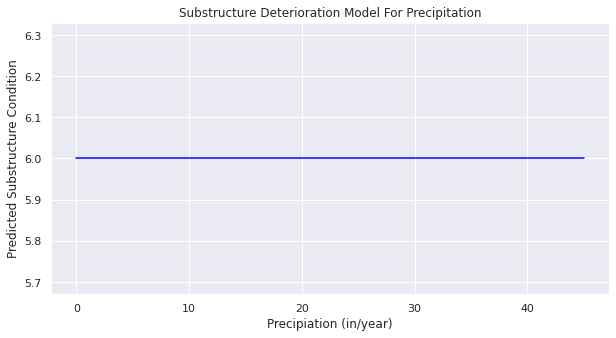

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(xvector, KA10, color ='blue')
plt.xlabel("Precipiation (in/year)")
plt.ylabel("Predicted Substructure Condition")
plt.title("Substructure Deterioration Model For Precipitation")
plt.show()

In [ ]:
KA11 = []
zvector=[]
for z in range(0,95,5): # Average Temperature
      pred_z = clf2.predict(np.array([50,2,30000,50,25,15,10,z,40,30,85]).reshape(1,-1))[0]
      KA11.append(pred_z)
      zvector.append(z)
      print(z,pred_z)

0 6.0
5 6.0
10 6.0
15 6.0
20 6.0
25 6.0
30 6.0
35 6.0
40 6.0
45 6.0
50 6.0
55 6.0
60 6.0
65 6.0
70 6.0
75 6.0
80 6.0
85 6.0
90 6.0


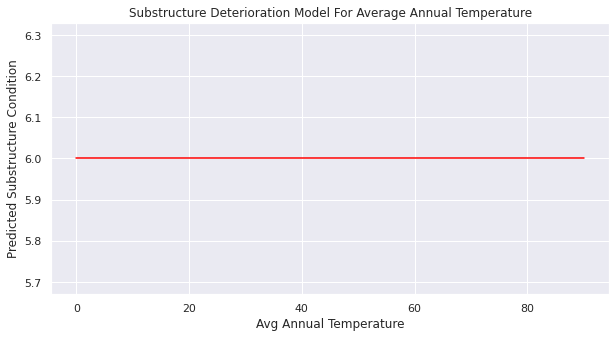

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(zvector, KA11, color ='red')
plt.xlabel("Avg Annual Temperature")
plt.ylabel("Predicted Substructure Condition")
plt.title("Substructure Deterioration Model For Average Annual Temperature")
plt.show()

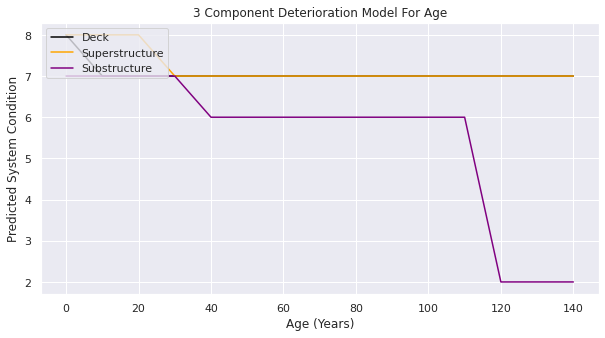

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(ivector, KA, color ='black',label = "Deck")
plt.plot(hvector, KA4, color ='orange',label = "Superstructure")
plt.plot(uvector, KA8, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Age (Years)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Age")
plt.show()

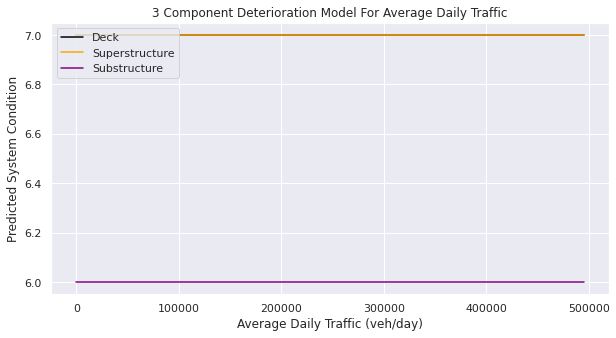

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(jvector, KA1, color ='black',label = "Deck")
plt.plot(mvector, KA5, color ='orange',label = "Superstructure")
plt.plot(yvector, KA9, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Average Daily Traffic (veh/day)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Average Daily Traffic")
plt.show()

ValueError: ignored

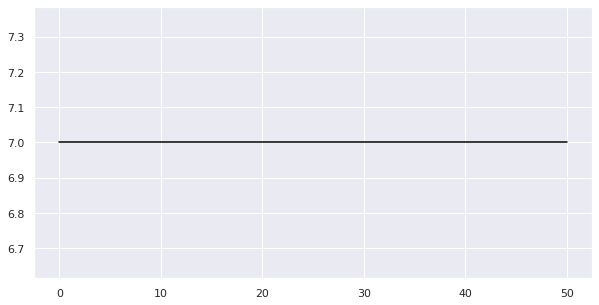

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(kvector, KA2, color ='black',label = "Deck")
plt.plot(nvector, KA7, color ='orange',label = "Superstructure")
plt.plot(xvector, KA10, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Yearly Precipitation (in)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Precipitation")
plt.show()

ValueError: ignored

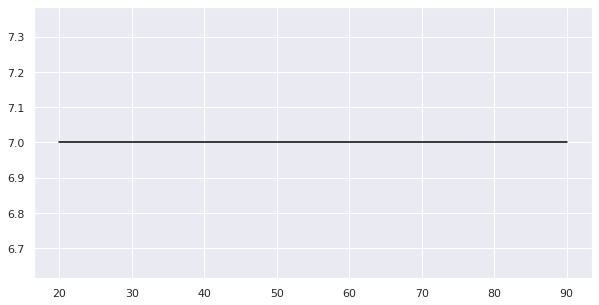

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.plot(lvector, KA3, color ='black',label = "Deck")
plt.plot(tvector, KA7, color ='orange',label = "Superstructure")
plt.plot(zvector, KA11, color ='purple', label = "Substructure")
plt.legend(loc="upper left")
plt.xlabel("Average Temperature (F)")
plt.ylabel("Predicted System Condition")
plt.title("3 Component Deterioration Model For Average Temperature")
plt.show()

**Visualization of Current Deck and Superstructure Materials** 

In [ ]:
#Visualizing current deck structure parameters
#Deck structure type is 106,wearing surface is 107,membrane type is 108,deck protection is 109
Vis=pd.read_csv("Datafor555/TX/TX20.csv")
Vis.iloc[:,106]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,75,96) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0        N
1        9
2        9
3        9
4        8
        ..
54677    1
54678    1
54679    1
54680    1
54681    1
Name: DECK_STRUCTURE_TYPE_107, Length: 54682, dtype: object

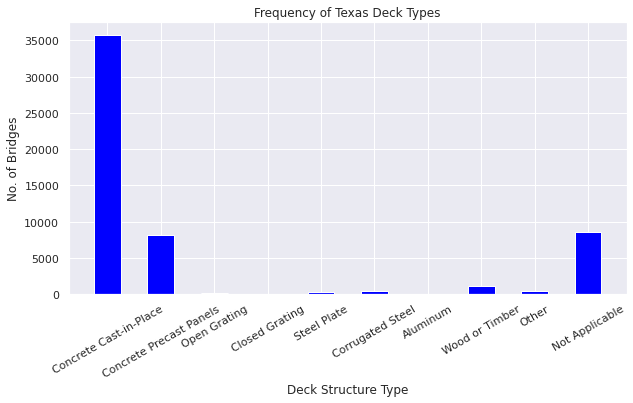

In [ ]:
Vis['DECK_STRUCTURE_TYPE_107'].value_counts()
# 1 Concrete Cast-in-Place 2 Concrete Precast Panels 3 Open Grating 4 Closed Grating 5 Steel plate 6 Corrugated Steel 7 Aluminum 8 Wood or Timber 9 Other N Not applicable
data_dict = {'Concrete Cast-in-Place':35727, 'Concrete Precast Panels':8149, 'Open Grating':98, 'Closed Grating':2,'Steel Plate':222,'Corrugated Steel':388,'Aluminum':9,'Wood or Timber':1093,'Other':380,'Not Applicable':8614}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='blue',
        width = 0.5)
plt.xlabel("Deck Structure Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Texas Deck Types")
plt.show()

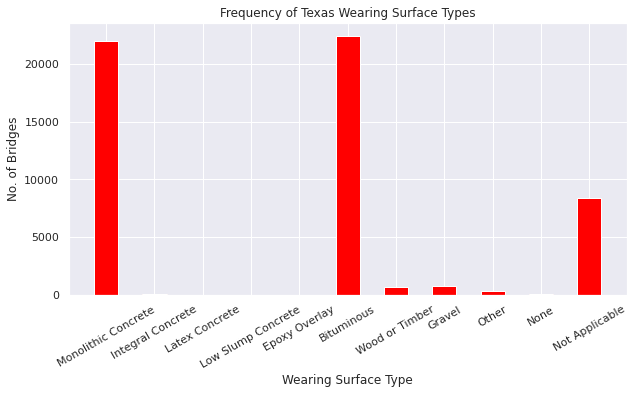

In [ ]:
Vis['SURFACE_TYPE_108A'].value_counts()
#1 Monolithic Concrete 2 Integral Concrete 3 Latex Concrete 4 Low Slump Concrete 5 Epoxy Overlay 6 Bituminous 7 Wood or Timber 8 Gravel 9 Other 0 None (no additional concrete thickness or N Not Applicable (applies only to structures
data_dict = {'Monolithic Concrete':21957, 'Integral Concrete':43, 'Latex Concrete':0, 'Low Slump Concrete':15,'Epoxy Overlay':23,'Bituminous':22413,'Wood or Timber':722,'Gravel':733,'Other':301, 'None':73,'Not Applicable':8402}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='red',
        width = 0.5)
plt.xlabel("Wearing Surface Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Texas Wearing Surface Types")
plt.show()

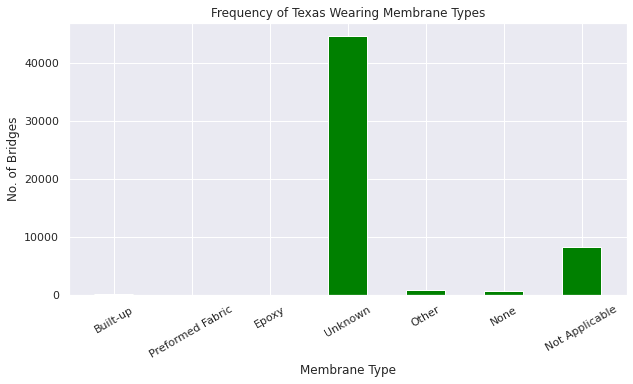

In [ ]:
Vis['MEMBRANE_TYPE_108B'].value_counts()
# 1 Built-up 2 Preformed Fabric 3 Epoxy 8 Unknown 9 Other 0 None N Not Applicable 
data_dict = {'Built-up':38, 'Preformed Fabric':0, 'Epoxy':17, 'Unknown':44706,'Other':891,'None':716,'Not Applicable':8314}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='green',
        width = 0.5)
plt.xlabel("Membrane Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Texas Wearing Membrane Types")
plt.show()


In [ ]:
Vis['DECK_PROTECTION_108C'].value_counts()
#1 Epoxy Coated Reinforcing 2 Galvanized Reinforcing 3 Other Coated Reinforcing 4 Cathodic Protection 6 Polymer Impregnated 7 Internally Sealed8 Unknown 9 Other 0 None N Not Applicable
data_dict = {'Epoxy Coated Reinforcing':1161, 'Galvanized Reinforcing':1, 'Other Coated Reinforcing':1, 'Cathodic Protection':6,'Polymer Impregnated':4,'Internally Sealed':1,'Unknown':44111,'Other':456,'None':619,'Not Applicable':8322}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(types, values, color ='orange',
        width = 0.5)
plt.xlabel("Deck Reinforcing Type")
plt.xticks(rotation=30)
plt.ylabel("No. of Bridges")
plt.title("Frequency of Texas Deck Reinforcing Type")
plt.show()

In [ ]:
#Superstructure material Material is 47, structure type is 48
import matplotlib.pyplot as plt
Vis['STRUCTURE_KIND_043A'].value_counts()
#1 Concrete 2 Concrete continuous 3 Steel 4 Steel continuous 5 Prestressed concrete * 6 Prestressed concrete continuous * 7 Wood or Timber 8 Masonry 9 Aluminum, Wrought Iron, or Cast Iron 0 Other
data_dict={'Concrete':27654,'Concrete Continuous':1734,'Steel':3901,'Steel Continuous':3161,'Prestressed Concrete':17321,'Prestressed Concrete Continuous':270,'Wood or Timber':439}
types = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.pie(values, labels=types,autopct='%1.1f%%')
plt.title("Proportion of Texas Superstructure Material")
plt.show()